# Task 4
Implementate un programma che, data una cartella di immagini e dati l’identificatore ID di una immagine, e un valore “k”, restituisca e visualizzi le k immagini piu’ simili a quella di identificatore ID sulla base di tutti i corrispondenti descrittori visuali.
Per ciascuna immagine restituita, restituire anche il matching score globale, oltre al contributo allo stesso da parte dei singoli modelli visuali utilizzati.

In [73]:
from ipynb.fs.full.task1_new import *
from ipynb.fs.full.task2 import *
from ipynb.fs.full.task3 import *

import numpy as np
from operator import itemgetter

from PIL import Image
from numpy import asarray
from scipy.stats import skew

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [74]:
dictionaryOfColorMomentsDescriptors = {}
dictionaryOfLBPDescriptors = {}
dictionaryOfHOGDescriptors = {}

# Opening JSON file
fColorMoments = open('./databasefileprimaparte/DB_ColorMoments_primaparte.json')

# returns JSON object as
# a dictionary
dictionaryOfColorMomentsDescriptors = json.load(fColorMoments)

# Closing file
fColorMoments.close()




# Opening JSON file
fHOG = open('./databasefileprimaparte/DB_HOG_primaparte.json')

# returns JSON object as
# a dictionary
dictionaryOfHOGDescriptors = json.load(fHOG)

# Closing file
fHOG.close()




# Opening JSON file
fLBP = open('./databasefileprimaparte/DB_LBP_primaparte.json')

# returns JSON object as
# a dictionary
dictionaryOfLBPDescriptors = json.load(fLBP)

# Closing file
fLBP.close()

In [75]:
HOGdescriptor = dictionaryOfHOGDescriptors
LBPdescriptor = dictionaryOfLBPDescriptors
colorMomentsdescriptor = dictionaryOfColorMomentsDescriptors

### Implementazione che calcola la distanza tra l'immagine in input e tutte le altre della cartella sulla base di tutti e 3 i decrittori implementati e restituisce un descrittore unico

- Il descrittore unico restituito dell'immagine Y è un vettore formato da 3 elementi:
    - distanza tra l'immagine in input e l'immagine Y secondo i color moments
    - distanza tra l'immagine in input e l'immagine Y secondo i le features LBP
    - distanza tra l'immagine in input e l'immagine Y secondo le HOG features

In [76]:
def calculateDistanceFromOtherImages(imageID):
    
    # ------------------------------------------------------------------------------------------------------------------------------------

    # COLOR MOMENTS

    colorMomentsOfInputImage = colorMomentsdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(colorMomentsOfInputImage)

    dictionaryOfDistancesColorMoments = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando i Color Moments
    for (key, v) in sorted(colorMomentsdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesColorMoments[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # ------------------------------------------------------------------------------------------------------------------------------------

    # HOG FEATURES
    
    HOGOfInputImage = HOGdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    numpyArr = np.array(HOGOfInputImage)

    dictionaryOfDistancesHOG = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando le HOG features
    for (key, v) in sorted(HOGdescriptor.items()):
        numpyArrOfV = np.array(v)
        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesHOG[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # ------------------------------------------------------------------------------------------------------------------------------------
    
    # LBP FEATURES
    
    LBPOfInputImage = LBPdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    # il descrittore contiene mean, std e skewness

    # lo trasformo in numpy array
    #numpyArr = np.array(LBPOfInputImage)

    dictionaryOfDistancesLBP = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando il descrittore LBP
    for (key, v) in sorted(LBPdescriptor.items()):
        #numpyArrOfV = np.array(v)
        numpyArrOfV = np.array(v)
        numpyArrOfLBPOfInputImage = np.array(LBPOfInputImage)

        dist = np.linalg.norm(numpyArrOfLBPOfInputImage - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistancesLBP[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # creo un dizionario chiave valore:
    # 'image-11' : [3.5, 0, 9] indica che l'immagine in input dista 3.5 secondo i color moments, 0 per lbp e 9 per HOG dall'immagine corrente del ciclo
    dictionaryOfDistancesFromInputImage = {}

    for i in range(0, len(dir_list)):
        distance = [dictionaryOfDistancesColorMoments[dir_list[i]], dictionaryOfDistancesLBP[dir_list[i]], dictionaryOfDistancesHOG[dir_list[i]]]
        dictionaryOfDistancesFromInputImage[dir_list[i]] = distance

    #print(dictionaryOfDistancesFromInputImage)
    #print(dictionaryOfDistancesLBP)

    return dictionaryOfDistancesFromInputImage

In [77]:
dictionaryOfDistancesFromImage = calculateDistanceFromOtherImages('image-0.png')

### Implementazione di una funzione che restituisce le K immagini più simili a quella in input tenendo in considerazione tutti e 3 i descrittori implementati

In [78]:
def calculateKsimilarImages(imageID, k):
    vectorOfDistancesOfInputImage = dictionaryOfDistancesFromImage[imageID]
    numpyArr = np.array(vectorOfDistancesOfInputImage)

    print("STAMPO IL DECRITTORE DELL?IMMAGINE IN INPUT FORMATO DALLE DISTANZE")
    print(numpyArr)

    dictionaryOfDistances = {}

    for (key, v) in sorted(dictionaryOfDistancesFromImage.items()):
        numpyArrOfV = np.array(v)

        dist = np.linalg.norm(numpyArr - numpyArrOfV)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistances[key] = (dist, numpyArrOfV)

    # print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key = lambda item: item[1][0], reverse=False)

    firstK = sortedDistances[:int(k)]

    print("STAMPO LE FIRST K")
    print(firstK)

    return firstK


In [79]:
kSimilarImages = calculateKsimilarImages('image-0.png', 20)

STAMPO IL DECRITTORE DELL?IMMAGINE IN INPUT FORMATO DALLE DISTANZE
[0. 0. 0.]
STAMPO LE FIRST K
[('image-0.png', (0.0, array([0., 0., 0.]))), ('image-2.png', (226.49428719148466, array([187.32374142, 127.17704195,   5.95634374]))), ('image-151.png', (232.9140729336437, array([207.38533869, 105.82060291,   6.50282002]))), ('image-152.png', (236.90245418457658, array([203.05457983, 121.86878189,   6.29368014]))), ('image-6.png', (239.20509997579032, array([218.8099736 ,  96.45724441,   6.10535087]))), ('image-159.png', (257.1068988325912, array([222.37113262, 128.90306435,   6.24794388]))), ('image-230.png', (279.52827426889945, array([251.19051428, 122.44182292,   6.88343297]))), ('image-231.png', (282.4490330339081, array([234.2963644 , 157.59441614,   6.83153643]))), ('image-236.png', (316.38361002795574, array([283.73690393, 139.80700984,   6.77923607]))), ('image-175.png', (332.894340019816, array([277.53678919, 183.67906794,   7.3465816 ]))), ('image-178.png', (333.74150954109524, 

5
STAMPO IL DECRITTORE DELL?IMMAGINE IN INPUT FORMATO DALLE DISTANZE
[0. 0. 0.]
STAMPO LE FIRST K
[('image-0.png', (0.0, array([0., 0., 0.]))), ('image-2.png', (226.49428719148466, array([187.32374142, 127.17704195,   5.95634374]))), ('image-151.png', (232.9140729336437, array([207.38533869, 105.82060291,   6.50282002]))), ('image-152.png', (236.90245418457658, array([203.05457983, 121.86878189,   6.29368014]))), ('image-6.png', (239.20509997579032, array([218.8099736 ,  96.45724441,   6.10535087]))), ('image-159.png', (257.1068988325912, array([222.37113262, 128.90306435,   6.24794388]))), ('image-230.png', (279.52827426889945, array([251.19051428, 122.44182292,   6.88343297]))), ('image-231.png', (282.4490330339081, array([234.2963644 , 157.59441614,   6.83153643]))), ('image-236.png', (316.38361002795574, array([283.73690393, 139.80700984,   6.77923607]))), ('image-175.png', (332.894340019816, array([277.53678919, 183.67906794,   7.3465816 ]))), ('image-178.png', (333.74150954109524

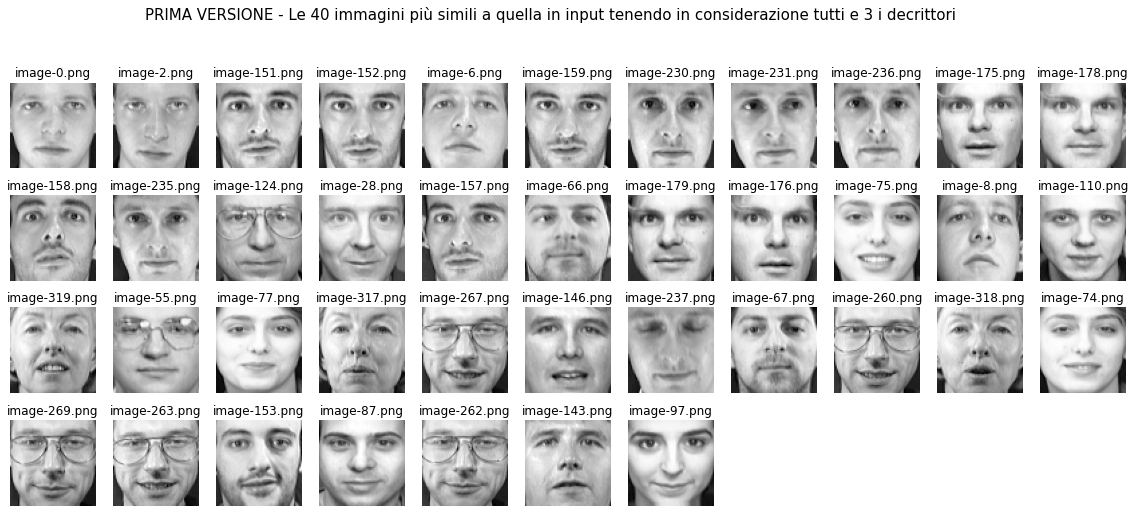

In [80]:
import math
# numero di immagini simili che vogliamo ottenere
k = 40

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

print(rows)

fig = plt.figure(figsize=(20, 10))
fig.suptitle('PRIMA VERSIONE - ' + 'Le ' + str(k) + ' immagini più simili a quella in input tenendo in considerazione tutti e 3 i decrittori', fontsize=15)
# plt.axis('off')
currentIndex = 1

kSimilarImagesOfColMom = calculateKsimilarImages('image-0.png', k)
#print(kSimilarImagesOfColMom)

for j in range(len(kSimilarImagesOfColMom)):
    imageName = kSimilarImagesOfColMom[j][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)

    fig.add_subplot(rows, columns, currentIndex)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(imageName) #+ '\n' + str(kSimilarImagesOfColMom[j][1])

    currentIndex += 1

plt.show()

### Versione alternativa
Nella versione alternativa per ogni immagine consideriamo come suo descrittore il descrittore ottenendo concatenando il suo descrittore dei ColorMoments, il suo descrittore di HOG e il suo descrittore di LBP.

#### Conclusioni
Il comportmento ottenuto è uguale identico a quello della prima versione che abbiamo implementato.

In [81]:
import operator

def alternativeVersion(imageID):
    
    # ------------------------------------------------------------------------------------------------------------------------------------

    colorMomentsOfInputImage = colorMomentsdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    HOGOfInputImage = HOGdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID
    LBPOfInputImage = LBPdescriptor[imageID] # recupero il descrittore dell'immagine di ID image ID

    # print("colorMomentsOfInputImage")
    # print(colorMomentsOfInputImage)
    # print("HOGOfInputImage")
    # print(HOGOfInputImage)
    # print("LBPOfInputImage")
    # print(LBPOfInputImage)
    
    tmp = colorMomentsOfInputImage + HOGOfInputImage
    concatenatedDescriptorOfInputImage = tmp + LBPOfInputImage

    npArrConcatenatedDescriptorOfInputImage = np.array(concatenatedDescriptorOfInputImage)

    print("STAMPO IL DESCRITTORE CONCATENATO")
    print(len(npArrConcatenatedDescriptorOfInputImage))

    # lo trasformo in numpy array
    #numpyArr = np.array(LBPOfInputImage)

    dictionaryOfDistances = {}

    # calcolo la distanza tra l'immagine in input tra tutte quelle presenti nella cartella usando il descrittore LBP
    for (key, v) in sorted(LBPdescriptor.items()):

        currentColorMomentsDescriptor = colorMomentsdescriptor[key]
        currentHOGDescriptor = HOGdescriptor[key]
        currentLBPDescriptor = LBPdescriptor[key]

        currentTmp = currentColorMomentsDescriptor + currentHOGDescriptor
        currentConcatenatedDescriptorOfInputImage = currentTmp + currentLBPDescriptor

        npArrCurrentConcatenatedDescriptorOfInputImage = np.array(currentConcatenatedDescriptorOfInputImage)

        dist = np.linalg.norm(npArrConcatenatedDescriptorOfInputImage - npArrCurrentConcatenatedDescriptorOfInputImage)   # calcolo la distanza euclidea tra i due descrittori
        dictionaryOfDistances[key] = dist   # distanza tra l'immmagine in input e quella di nome key ('image-N')

    # print("STAMPO dictionaryOfDistances")
    # print(dictionaryOfDistances)

    sortedDistances = sorted(dictionaryOfDistances.items(), key=operator.itemgetter(1))

    firstK = sortedDistances[:int(k)]

    print("STAMPO LE FIRST K")
    print(firstK)

    return firstK

In [82]:
mostSimilarKImagesAlternativeVersion = alternativeVersion('image-0.png')

STAMPO IL DESCRITTORE CONCATENATO
4228
STAMPO LE FIRST K
[('image-0.png', 0.0), ('image-2.png', 226.49428719148477), ('image-151.png', 232.91407293364358), ('image-152.png', 236.90245418457633), ('image-6.png', 239.20509997579043), ('image-159.png', 257.10689883259107), ('image-230.png', 279.5282742688995), ('image-231.png', 282.44903303390817), ('image-236.png', 316.3836100279557), ('image-175.png', 332.89434001981584), ('image-178.png', 333.7415095410953), ('image-158.png', 339.44289543528356), ('image-235.png', 345.98294732774707), ('image-124.png', 348.2516475593941), ('image-28.png', 350.775246767318), ('image-157.png', 357.4296091956597), ('image-66.png', 359.4745439019057), ('image-179.png', 360.25488379998546), ('image-176.png', 365.15477737788535), ('image-75.png', 370.3729626681555), ('image-8.png', 373.0403189975579), ('image-110.png', 373.0551906319693), ('image-319.png', 373.6393960423533), ('image-55.png', 375.11674518099187), ('image-77.png', 377.32661760553987), ('image

5


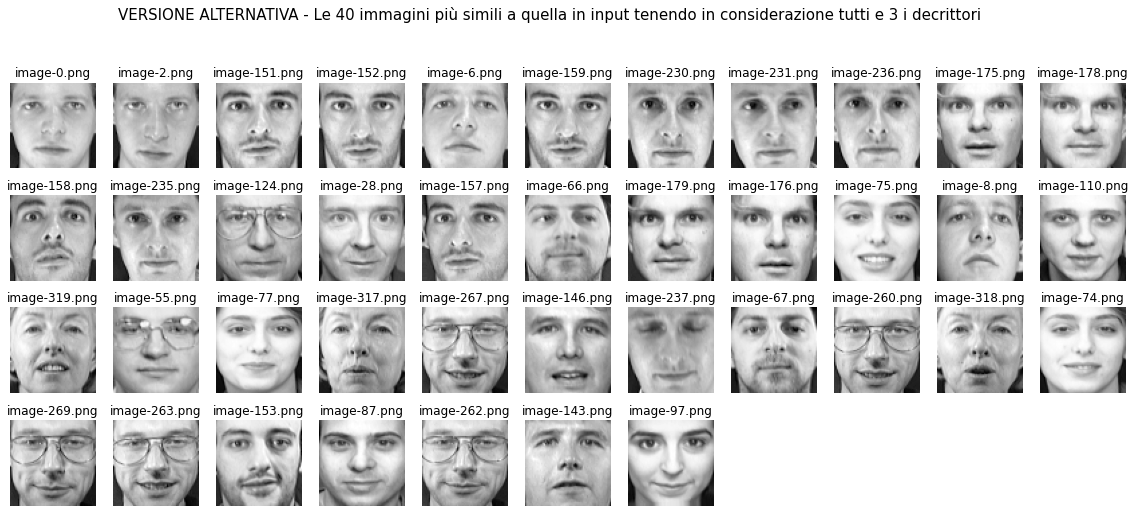

In [83]:
import math
# numero di immagini simili che vogliamo ottenere
k = 40

w = 10
h = 10
columns = 11    # le colonne sono 11 per riga
rows = math.trunc(k / 10) + 1

print(rows)

fig = plt.figure(figsize=(20, 10))
fig.suptitle('VERSIONE ALTERNATIVA - ' + 'Le ' + str(k) + ' immagini più simili a quella in input tenendo in considerazione tutti e 3 i decrittori', fontsize=15)
# plt.axis('off')
currentIndex = 1

for j in range(len(mostSimilarKImagesAlternativeVersion)):
    imageName = mostSimilarKImagesAlternativeVersion[j][0]
    # load the image
    image = Image.open('./olivetti_PNG_master/images/' + imageName)

    fig.add_subplot(rows, columns, currentIndex)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title(imageName) #+ '\n' + str(kSimilarImagesOfColMom[j][1])

    currentIndex += 1

plt.show()